![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [5]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


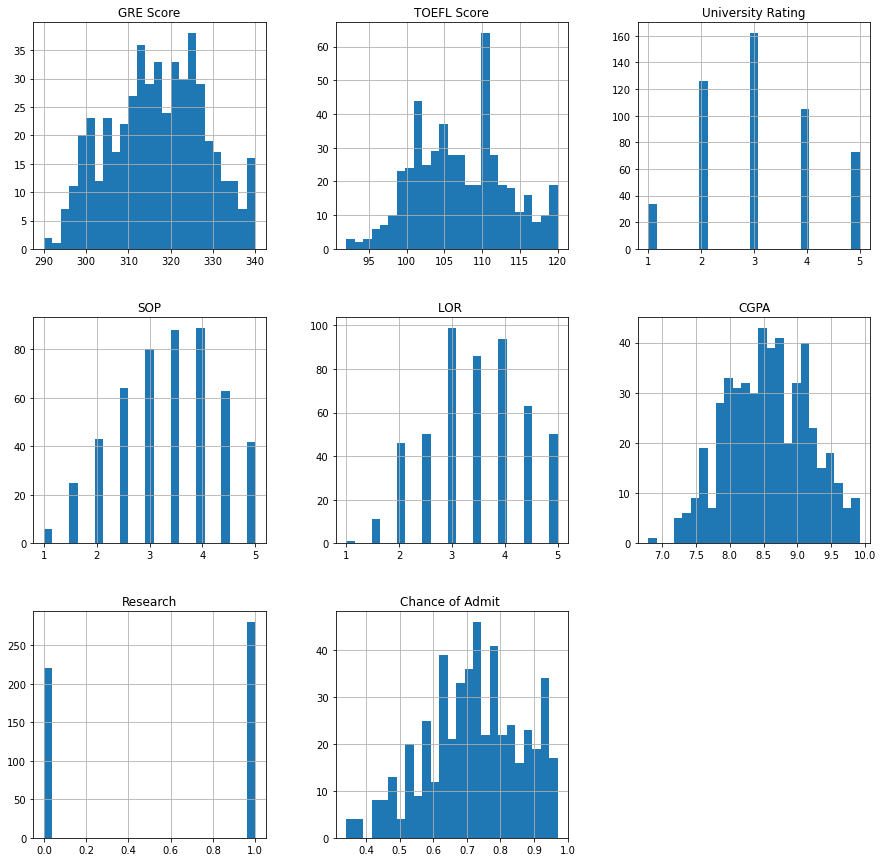

In [6]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

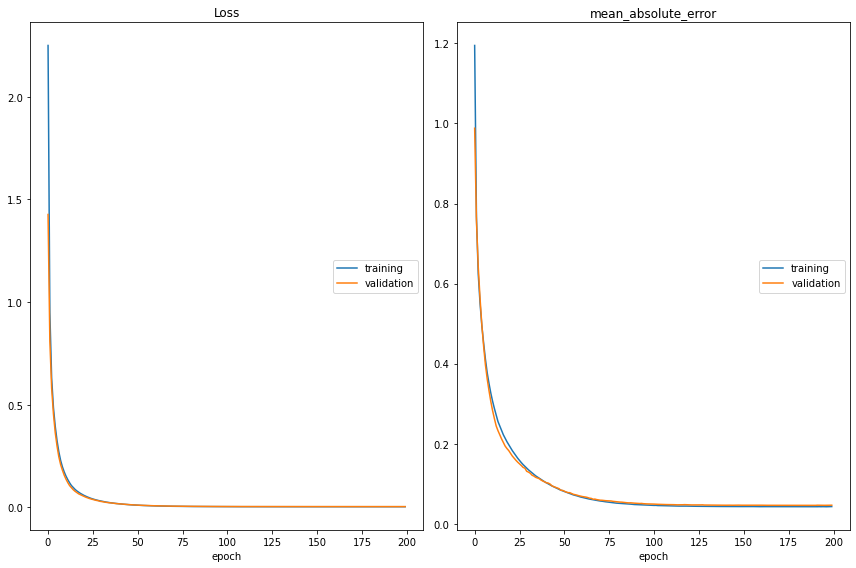

Loss
	training         	 (min:    0.004, max:    2.250, cur:    0.004)
	validation       	 (min:    0.004, max:    1.427, cur:    0.004)
mean_absolute_error
	training         	 (min:    0.043, max:    1.195, cur:    0.043)
	validation       	 (min:    0.046, max:    0.988, cur:    0.047)
5/5 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0414
El MSE en test es:  0.003160515334457159
El MAE en test es:  0.041377823799848557


In [9]:
# Celda 1

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

# Definición de dimensiones de salida, varaibles de interés
output_var = 1

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]

# Red neuronal de una sola capa
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de pérdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=1)

# Entrenamiento de la red neuronal con 200 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=200, 
          validation_data=(X_val, Y_val),
          callbacks=[PlotLossesKeras()])

# métricas
scores=model.evaluate(X_test, Y_test)
mse_1=scores[0]
mae_1=scores[1]

print("El MSE en test es: ", mse_1)
print("El MAE en test es: ", mae_1)

**Comentarios:**
* Utilizamos el optimizador "Stochastic gradient descent" para el problema de regresión, con la función de pérdida error cuadrático medio (típica para los problemas de regresión).
* Corremos el modelo 200 épocas. Aunque el modelo converge antes y podría correrse por menos épocas, esta cantidad permite comparar mejor el comportamiento del modelo en función de las épocas con respecto a los modelos más complejos que se desarrollan en los puntos siguientes. 
* Evidenciamos que el modelo converge alrededor de los 50 epochs, aunque el MAE parece reducir un poco incluso luego de estos epochs, aunque la disminución es mucho menor.
* El mínimo MAE obtenido en el set de validación es cercano a 0.041.
* El MSE obtenido fue cercano a 0.0031 (el resultado de la función de pérdida usado).

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

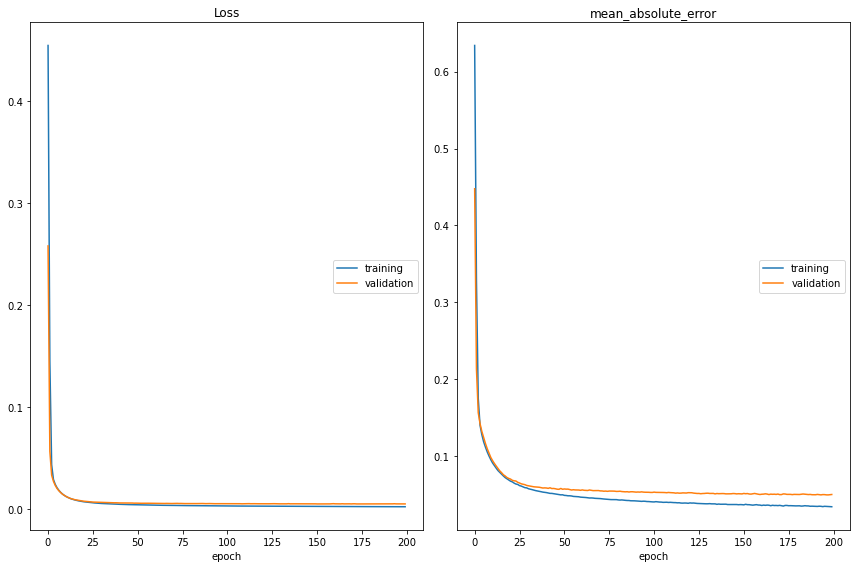

Loss
	training         	 (min:    0.002, max:    0.455, cur:    0.002)
	validation       	 (min:    0.005, max:    0.258, cur:    0.005)
mean_absolute_error
	training         	 (min:    0.035, max:    0.634, cur:    0.035)
	validation       	 (min:    0.050, max:    0.448, cur:    0.051)
5/5 [==============================] - 0s 3ms/step - loss: 0.0043 - mean_absolute_error: 0.0500
El MSE en test es:  0.00430162250995636
El MAE en test es:  0.04998694732785225


In [10]:
# Celda 2

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de las capas densas 
model.add(Dense(512, input_shape=(dims,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=2)

# Entrenamiento de la red neuronal con 200 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=200, 
          callbacks=[PlotLossesKeras()])

# métricas
scores_2=model.evaluate(X_test, Y_test)
mse_2=scores_2[0]
mae_2=scores_2[1]

print("El MSE en test es: ", mse_2)
print("El MAE en test es: ", mae_2)

**Comentarios:**
* Utilizamos dos capas con activación tipo "relu" (debido a que el problema es de regresión), ambas con tamaño de salida igual a 512 (probamos con diferentes valores y al final optamos por estos por su desempeño).
* El MSE en la muestra de validación es de 0.0043
* El MAE en la muestra de validacíon es de 0.049
* Comparado con la red de una capa del punto anterior, el desempeño en el set de validación disminuyó un poco (tanto el MSE como el MAE son ligeramente mayores). Pero, también evidenciamos que en el set de entrenamiento los valores son menores, lo que podría indicarnos un overfitting y por tanto la disminución de desempeño.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

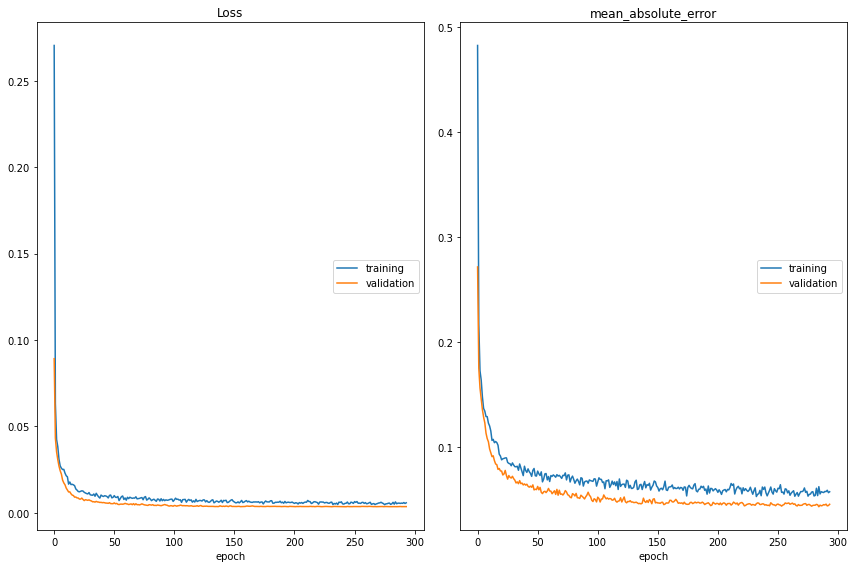

Loss
	training         	 (min:    0.005, max:    0.270, cur:    0.006)
	validation       	 (min:    0.003, max:    0.089, cur:    0.004)
mean_absolute_error
	training         	 (min:    0.053, max:    0.483, cur:    0.057)
	validation       	 (min:    0.043, max:    0.272, cur:    0.046)
10/10 [==============================] - 0s 52ms/step - loss: 0.0058 - mean_absolute_error: 0.0575 - val_loss: 0.0036 - val_mean_absolute_error: 0.0456
Epoch 294: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.0036 - mean_absolute_error: 0.0456
El MSE en test es:  0.0035682825837284327
El MAE en test es:  0.04555531591176987


In [11]:
# Celda 3

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

from keras.callbacks import EarlyStopping, ModelCheckpoint
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de las capas densas 
model.add(Dropout(0.1, input_shape=(dims,)))   ##dropout 
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1) 

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=3)

# Entrenamiento de la red neuronal con 200 épocas
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=1000, 
          callbacks=[PlotLossesKeras(), early_stop])

# métricas
scores_3=model.evaluate(X_test, Y_test)
mse_3=scores_3[0]
mae_3=scores_3[1]

print("El MSE en test es: ", mse_3)
print("El MAE en test es: ", mae_3)

**Comentarios:**
* Para esta red, utilizamos capas de dropout para omitir aleatoriamente algunas neuronas, y así buscar corregir el potencial sobreajuste. Elegimos una fracción del 10% en cada capa de dropout.
* En las gráficas evidenciamos un poco más de varianza, pero una menor diferencia entre el error de los sets de training y validación. 
* El MSE en la muestra de validación es de 0.0035
* El MAE en la muestra de validacíon es de 0.045
* Comparado con la red de una sola capa (punto 1), el desempeño en el set de validación disminuyó (tanto el MSE como el MAE son mayores). Si bien evidenciamos que en el set de entrenamiento los valores son menores, la diferencia no es tanta como con la red de dos capas del punto anterior, lo que podría indicarnos que no es tanto debido a overfitting sino menor desempeño general.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Comparación por MSE de los 3 modelos
Modelo 1: Red Neuronal de una capa 
Modelo 2: Red Neuronal multicapa 
Modelo 3: Red Neuronal multicapa con early stopping y dropout


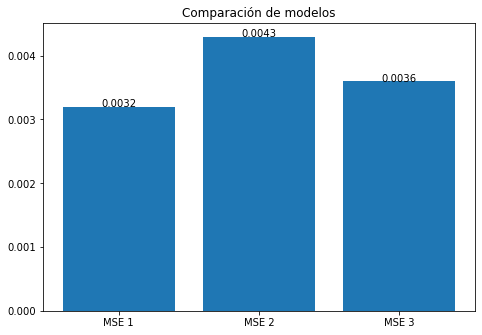

In [12]:
# Celda 4

import matplotlib.pyplot as plt

print('Comparación por MSE de los 3 modelos')
print("Modelo 1: Red Neuronal de una capa \nModelo 2: Red Neuronal multicapa \nModelo 3: Red Neuronal multicapa con early stopping y dropout")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MSE 1', 'MSE 2', 'MSE 3']
ejeY = [round(mse_1, 4), round(mse_2, 4), round(mse_3, 4)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i],ha='center')
        
addlabels(ejeX,ejeY,plt)

plt.show()

Comparación por MAE de los 3 modelos
Modelo 1: Red Neuronal de una capa 
Modelo 2: Red Neuronal multicapa 
Modelo 3: Red Neuronal multicapa con early stopping y dropout


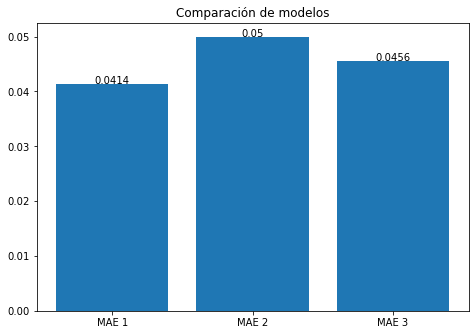

In [13]:
print('Comparación por MAE de los 3 modelos')
print("Modelo 1: Red Neuronal de una capa \nModelo 2: Red Neuronal multicapa \nModelo 3: Red Neuronal multicapa con early stopping y dropout")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MAE 1', 'MAE 2', 'MAE 3']
ejeY = [round(mae_1, 4), round(mae_2, 4), round(mae_3, 4)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i],ha='center')
        
addlabels(ejeX,ejeY,plt)

plt.show()

**Comentarios:**
* En general, el MAE y MSE obtenidos son menores en la red neuronal de una sola capa. Por lo tanto, el modelo de mejor desempeño es este (red neuronal de una sola capa: MAE 1 y MSE 1)
* Consideramos que lo anterior puede deberse a que los datos pueden ser fácilmente representados por funciones no muy complejas, y al aumentar el número de capas (y con ello, la complejidad de las funciones) estamos generando un overfitting y una mayor varianza en los resultados del modelo.